In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

tqdm.pandas()

%matplotlib inline

NUM_FEATURES = 5000
NUM_CLASSES = 3993

In [2]:
features = pd.read_csv("../data/expanded/train_features.csv", names=range(NUM_FEATURES))
labels = pd.read_csv("../data/expanded/train_labels.csv", names=range(NUM_CLASSES))

In [3]:
features

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.084556,0.138594,0.094304,0.195764,0.612552,0.106491,0.137765,0.145839,0.304610,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.050734,0.762265,0.754431,0.065255,0.350030,0.000000,0.137765,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.101468,0.138594,0.377215,0.130509,0.175015,0.745434,0.137765,1.020873,1.218441,0.309297,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186024,0.346484,0.141456,0.195764,0.262522,0.425962,0.551062,0.437517,0.609220,0.618594,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.135290,0.277187,0.141456,0.065255,1.137597,0.106491,0.137765,0.583356,0.152305,0.154649,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15506,0.101468,1.940310,0.801583,0.717802,0.875075,3.301208,0.964358,1.895908,15.687426,1.546485,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15507,0.084556,0.450429,0.235760,0.261019,0.350030,0.638943,0.413296,0.291678,0.456915,0.927891,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15508,0.050734,0.346484,0.188608,0.130509,0.087507,1.277887,0.137765,0.145839,1.066136,0.773243,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15509,0.084556,2.390740,0.848735,0.717802,1.050090,1.277887,0.964358,1.458391,4.264543,4.948753,...,0.0,0.0,5.488306,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
labels

,0,1,2,3,4,5,6,7,8,9,...,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
features.describe()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,...,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000,15511.000000
mean,0.121466,0.706791,0.527973,0.218982,0.487460,1.272484,0.223057,0.571180,1.603156,0.774549,...,0.060152,0.053075,0.060505,0.064751,0.029722,0.054844,0.042106,0.260775,0.051437,0.027669
std,0.536157,1.785123,1.469198,0.271999,1.963318,3.910044,0.557398,1.332201,5.056606,3.589815,...,1.413051,2.268822,1.909316,1.623293,0.670579,1.641501,0.909665,18.426712,1.098012,0.551129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050734,0.173242,0.141456,0.130509,0.175015,0.319472,0.137765,0.145839,0.304610,0.309297,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.067645,0.311836,0.235760,0.130509,0.262522,0.638943,0.137765,0.291678,0.609220,0.463946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.118379,0.692968,0.518671,0.261019,0.525045,1.064906,0.275531,0.583356,1.370746,0.927891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.307835,87.383263,115.192162,10.832283,211.768082,228.848251,42.707283,70.440269,351.367889,404.869812,...,82.324593,263.438690,159.160873,109.766121,54.883060,164.649185,65.859673,2195.322510,66.027512,33.013756


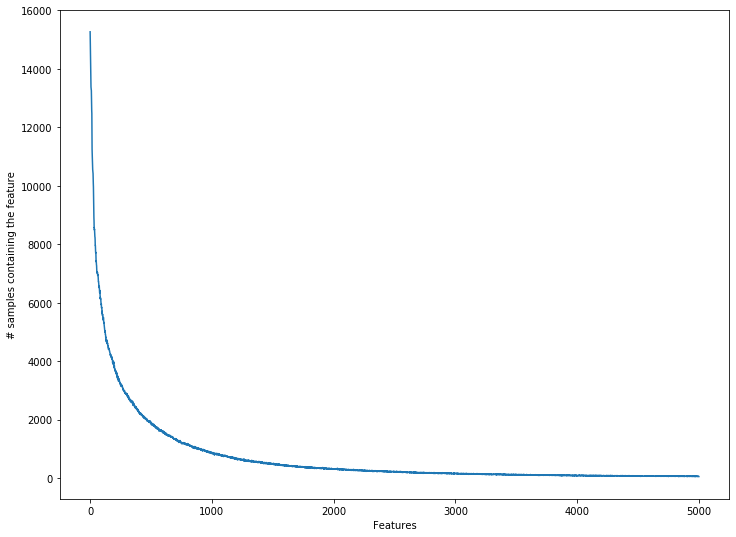

In [6]:
(features != 0).sum(axis=0).plot(figsize=(12, 9))
plt.xlabel("Features")
plt.ylabel("# samples containing the feature")
plt.show()

In [7]:
examples_per_label = labels.sum(axis=0)
examples_per_label.describe()

count    3993.000000
mean       20.668670
std        54.656906
min         0.000000
25%         2.000000
50%         5.000000
75%        16.000000
max      1006.000000
dtype: float64

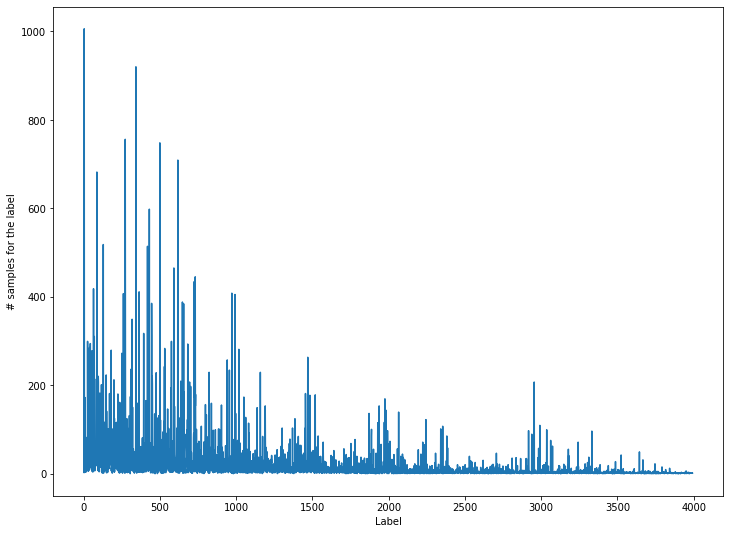

In [8]:
examples_per_label.plot(figsize=(12, 9))
plt.xlabel("Label")
plt.ylabel("# samples for the label")
plt.show()

In [9]:
print(f"{examples_per_label[examples_per_label == 0].shape[0]} labels with no examples")

207 labels with no examples


In [10]:
# Count of examples in the given range. For example, the second line can be
# interpreted as - there are 1211 examples having 2, 3, 4, or 5 labels each
pd.cut(
    examples_per_label,
    bins=[0, 1, 5, 25, 125, 250, 500, 1010],
    include_lowest=True
).value_counts(sort=False)

(-0.001, 1.0]       929
(1.0, 5.0]         1211
(5.0, 25.0]        1164
(25.0, 125.0]       562
(125.0, 250.0]       88
(250.0, 500.0]       30
(500.0, 1010.0]       9
dtype: int64

In [11]:
labels_per_example = labels.sum(axis=1)
labels_per_example.describe()

count    15511.00000
mean         5.32074
std          1.35468
min          1.00000
25%          5.00000
50%          6.00000
75%          6.00000
max         24.00000
dtype: float64